## 🔶 Simple SMS Spam Detection Model

In [1]:
import pandas as pd

data = {
    'message': [
        "Hey, are we still meeting today?",
        "You won a free lottery ticket! Call now.",
        "I'll call you later.",
        "What's up?",
        "URGENT! You've won a 1-week vacation.",
        "Let's catch up tomorrow.",
        "Congratulations! You got selected for a prize.",
        "See you at the party tonight.",
        "Win a new iPhone now. Click here!",
        "Don't forget to bring the documents."
    ],
    
    'label': ['ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham']
}

df = pd.DataFrame(data)
df.head()

,message,label
0,"Hey, are we still meeting today?",ham
1,You won a free lottery ticket! Call now.,spam
2,I'll call you later.,ham
3,What's up?,ham
4,URGENT! You've won a 1-week vacation.,spam


In [2]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('vectorizer', CountVectorizer(), 'message')
])

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

final_pipeline = Pipeline([
    ('pre_model', preprocessor),
    ('naive_bayes', MultinomialNB())
])

In [7]:
from sklearn.model_selection import train_test_split

X = df[['message']]
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
from sklearn.metrics import accuracy_score, classification_report

final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



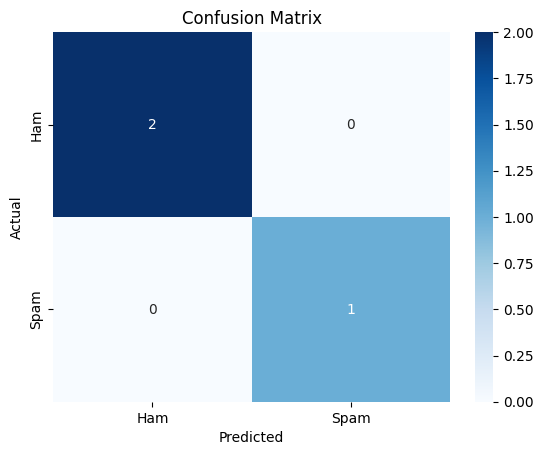

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

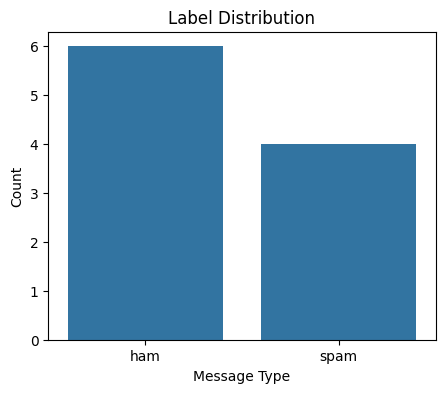

In [10]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()